# About Dataset


# Librerie e dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn as sn #scikit-learn
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import keras

ModuleNotFoundError: No module named 'keras'

# Analisi esplorativa

1. Importazione di un dataset di lavoro
2. Comprensione del quadro generale
3. Preparazione
4. Comprensione delle variabili
5. Studio delle relazioni tra variabili
6. Brainstorming

# Analisi esplorativa

### 1. Importazione di un dataset di lavoro

In [ ]:
file_dataset = 'neo.csv'

df = pd.read_csv(file_dataset)

df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
# Converti i valori booleani in 0 e 1 nella colonna 'Valore_booleano'
df['hazardous'] = df['hazardous'].astype(int)

# Visualizza il DataFrame modificato
print("\nDataFrame con valori booleani convertiti in 0 e 1:")
print(df)
df.to_csv('Images\\file.csv', index=False)


DataFrame con valori booleani convertiti in 0 e 1:
             id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_dist

### 2. Comprensione del quadro generale

**Obiettivo:** capire il problema che vogliamo andare a risolvere, andando a ragionare sull’intero dataset e sul significato delle variabili.

Grandezza del dataset 

In [ ]:
df.shape

(90836, 10)

Variabili

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(1), object(2)
memory usage: 6.0+ MB


Descrizione generale del dataset

In [ ]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103,0.097318
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086,0.296392
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000,0.000000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000,0.000000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000,0.000000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000


### 3. Preparazione del dataset 

* esistono variabili inutili o ridondanti?
* la nomenclatura ha senso?
* ci sono delle nuove variabili che vogliamo creare?

Cerchiamo se ci sono righe duplicate

In [ ]:
df.duplicated().sum()

0

In questo dataset non ci sono righe duplicate e disponiamo di una nomenclatura delle variabili già soddisfaciente, inoltre per il momento non si vede la necessità di creare nuove variabili.

In [ ]:
# Contare il numero di valori null per colonna
conteggio_valori_null = df.isnull().sum()

# Visualizzare il risultato
print(conteggio_valori_null)


id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


Qui eliminiamo le seguenti variabili:

* name
* sentry_object
* orbiting_body

Infatti, come si nota dai grafici sottostanti "sentry_object" e "orbiting_body" hanno sempre lo stesso valore in tutto il dataset, invece "name" non reputiamo essere una variabile utile.

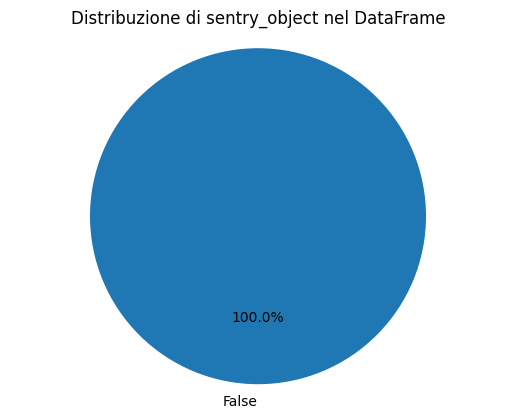

In [ ]:
# Conta le occorrenze di ciascun valore nella variabile "sentry_object"
conteggio_categorie = df['sentry_object'].value_counts()

# Crea il grafico a torta
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=90)

# Imposta l'aspetto di cerchio per assicurarsi che il grafico a torta sia circolare
plt.axis('equal')

# Aggiungi un titolo al grafico
plt.title('Distribuzione di sentry_object nel DataFrame')

# Mostra il grafico
plt.show()

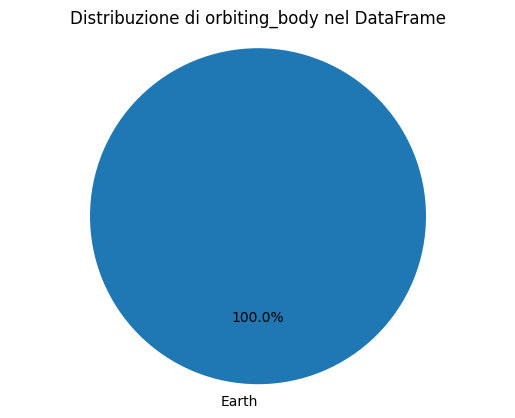

In [ ]:
# Conta le occorrenze di ciascun valore nella variabile "sentry_object"
conteggio_categorie = df['orbiting_body'].value_counts()

# Crea il grafico a torta
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=90)

# Imposta l'aspetto di cerchio per assicurarsi che il grafico a torta sia circolare
plt.axis('equal')

# Aggiungi un titolo al grafico
plt.title('Distribuzione di orbiting_body nel DataFrame')

# Mostra il grafico
plt.show()

In [ ]:
colonne_da_rimuovere=["name","sentry_object","orbiting_body"]
df = df.drop(colonne_da_rimuovere, axis = 1)
df

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...,...,...
90831,3763337,0.026580,0.059435,52078.886692,1.230039e+07,25.00,0
90832,3837603,0.016771,0.037501,46114.605073,5.432121e+07,26.00,0
90833,54017201,0.031956,0.071456,7566.807732,2.840077e+07,24.60,0
90834,54115824,0.007321,0.016370,69199.154484,6.869206e+07,27.80,0


### 4. Analisi univariata

Fase utile nel comprendere e descrivere le variabili di interesse.
In questo caso ci concentreremo sulle variabili "categoriali" e cercehremo di capire quanto sono bilanciate le classi all'interno del dataset

**hazardous**

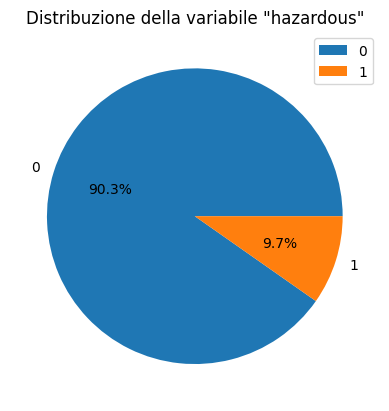

Valori False
81996
Valori True
8840


In [ ]:
# Calcola i conteggi delle due classi

count_hazardous_0 = df["hazardous"].value_counts()[0]
count_hazardous_1 = df["hazardous"].value_counts()[1]

plt.pie(df["hazardous"].value_counts(), labels=["0", "1"], autopct='%1.1f%%')
plt.legend()
plt.title("Distribuzione della variabile \"hazardous\"")
plt.show()

print("Valori False")
print(count_hazardous_0)
print("Valori True")
print(count_hazardous_1)

**est_diameter_min**

In [ ]:
df.est_diameter_min.describe()

count    90836.000000
mean         0.127432
std          0.298511
min          0.000609
25%          0.019256
50%          0.048368
75%          0.143402
max         37.892650
Name: est_diameter_min, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


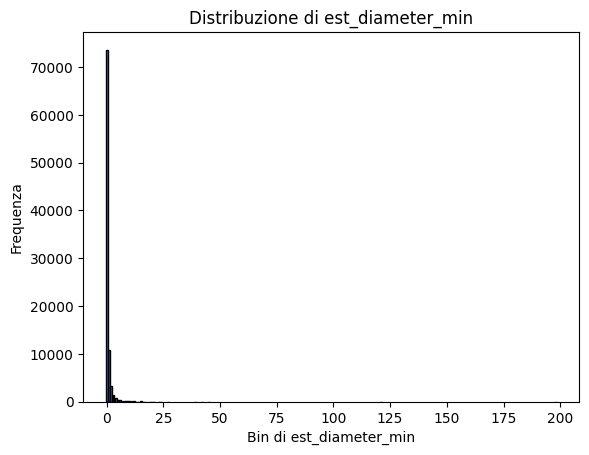

In [ ]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["est_diameter_min"].min(), df["est_diameter_min"].max(), 200)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['est_diameter_min'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di est_diameter_min')
plt.xlabel('Bin di est_diameter_min')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [ ]:
print(f"Curtosi: {df['est_diameter_min'].kurt()}")
print(f"Asimmetria: {df['est_diameter_min'].skew()}")

Curtosi: 4017.3798686529044
Asimmetria: 41.1399519487211


**est_diameter_max**

In [ ]:
df.est_diameter_max.describe()

count    90836.000000
mean         0.284947
std          0.667491
min          0.001362
25%          0.043057
50%          0.108153
75%          0.320656
max         84.730541
Name: est_diameter_max, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


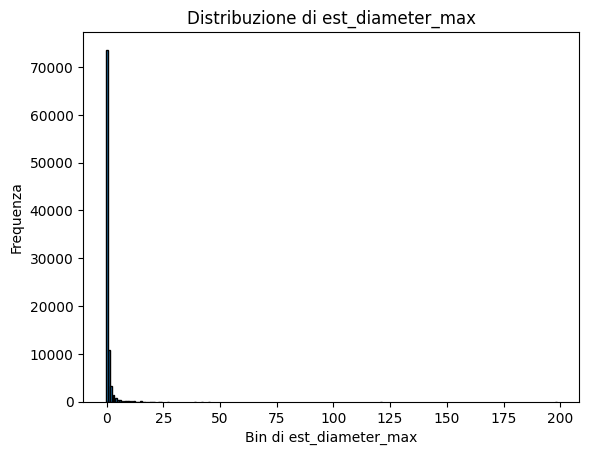

In [ ]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["est_diameter_max"].min(), df["est_diameter_max"].max(), 200)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['est_diameter_max'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di est_diameter_max')
plt.xlabel('Bin di est_diameter_max')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [ ]:
print(f"Curtosi: {df['est_diameter_max'].kurt()}")
print(f"Asimmetria: {df['est_diameter_max'].skew()}")

Curtosi: 4017.379868686785
Asimmetria: 41.139951948962064


**relative_velocity**

In [ ]:
df.relative_velocity.describe()

count     90836.000000
mean      48066.918918
std       25293.296961
min         203.346433
25%       28619.020645
50%       44190.117890
75%       62923.604633
max      236990.128088
Name: relative_velocity, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


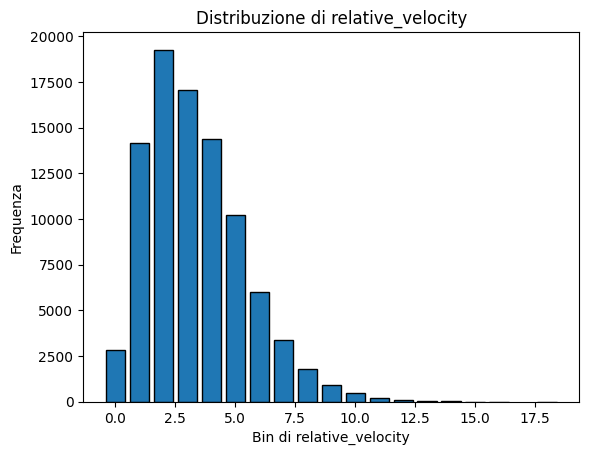

In [ ]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["relative_velocity"].min(), df["relative_velocity"].max(), 20)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['relative_velocity'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di relative_velocity')
plt.xlabel('Bin di relative_velocity')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [ ]:
print(f"Curtosi: {df['relative_velocity'].kurt()}")
print(f"Asimmetria: {df['relative_velocity'].skew()}")

Curtosi: 0.9948353130313032
Asimmetria: 0.9051249321533839


**miss_distance**

In [ ]:
df.miss_distance.describe()

count    9.083600e+04
mean     3.706655e+07
std      2.235204e+07
min      6.745533e+03
25%      1.721082e+07
50%      3.784658e+07
75%      5.654900e+07
max      7.479865e+07
Name: miss_distance, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


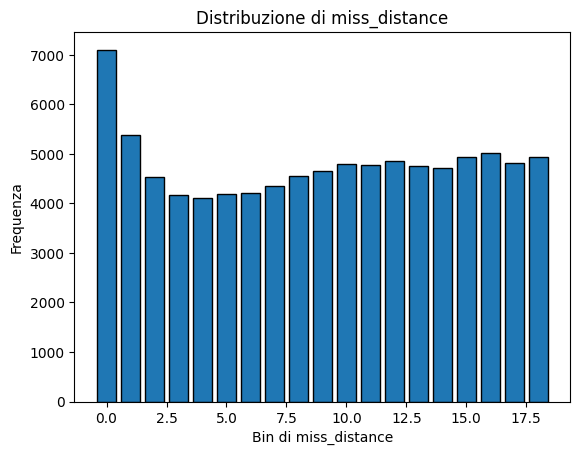

In [ ]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["miss_distance"].min(), df["miss_distance"].max(), 20)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['miss_distance'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di miss_distance')
plt.xlabel('Bin di miss_distance')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [ ]:
print(f"Curtosi: {df['miss_distance'].kurt()}")
print(f"Asimmetria: {df['miss_distance'].skew()}")

Curtosi: -1.2384548852282553
Asimmetria: -0.04270598169888323


**absolute_magnitude**

In [ ]:
df.absolute_magnitude.describe()

count    90836.000000
mean        23.527103
std          2.894086
min          9.230000
25%         21.340000
50%         23.700000
75%         25.700000
max         33.200000
Name: absolute_magnitude, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


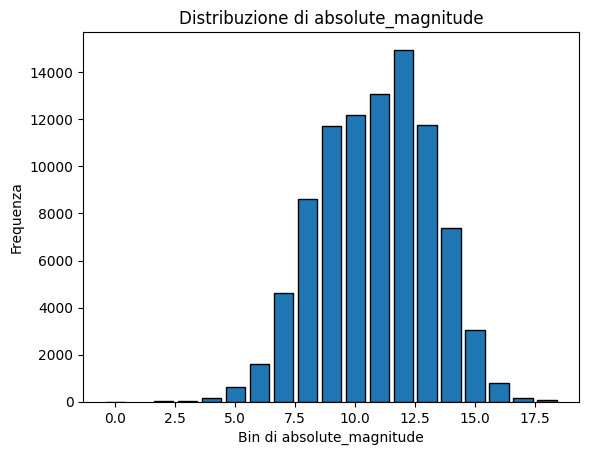

In [ ]:
# Definisci i bin per la suddivisione di relative_velocity
bins = np.linspace(df["absolute_magnitude"].min(), df["absolute_magnitude"].max(), 20)

# Crea una colonna 'Bin' nel DataFrame basata sui bin
df['Bin'] = pd.cut(df['absolute_magnitude'], bins=bins, labels=False)

# Conta la frequenza di ogni bin
bin_counts = df['Bin'].value_counts(sort=False)

# Creiamo il grafico a barre
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

plt.title('Distribuzione di absolute_magnitude')
plt.xlabel('Bin di absolute_magnitude')
plt.ylabel('Frequenza')

# Nascondi la legenda
plt.legend().set_visible(False)

plt.show()

In [ ]:
print(f"Curtosi: {df['absolute_magnitude'].kurt()}")
print(f"Asimmetria: {df['absolute_magnitude'].skew()}")

Curtosi: -0.4449527026542426
Asimmetria: -0.13741956613464948


**Media tra est_diameter_max e est_diameter_min**

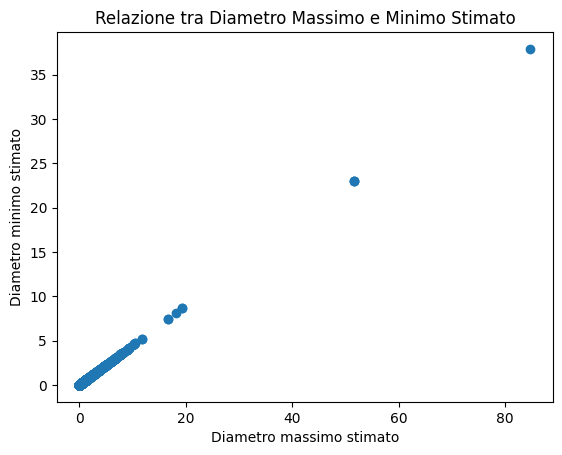

In [ ]:
# Aggiungi la variabile di media
df['media_diametro'] = (df['est_diameter_max'] + df['est_diameter_min']) / 2

# Crea un grafico a dispersione per visualizzare la relazione tra est_diameter_max e est_diameter_min
plt.scatter(df['est_diameter_max'], df['est_diameter_min'])
plt.xlabel('Diametro massimo stimato')
plt.ylabel('Diametro minimo stimato')
plt.title('Relazione tra Diametro Massimo e Minimo Stimato')
plt.show()

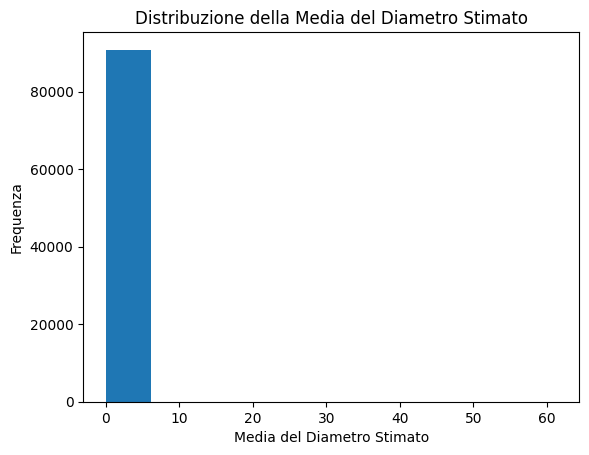

In [ ]:
# Crea un istogramma per visualizzare la distribuzione della variabile di media
plt.hist(df['media_diametro'])
plt.xlabel('Media del Diametro Stimato')
plt.ylabel('Frequenza')
plt.title('Distribuzione della Media del Diametro Stimato')
plt.show()

### 4. Studio delle relazioni tra variabili

In [ ]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,Bin,media_diametro
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,0.277258,-0.123443,0.273645,-0.148322
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.605552,1.000000
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.605552,1.000000
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185,-0.351068,0.221553
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302,-0.261743,0.142241
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267,0.992122,-0.560188
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000,-0.363147,0.183363
Bin,0.273645,-0.605552,-0.605552,-0.351068,-0.261743,0.992122,-0.363147,1.000000,-0.605552
media_diametro,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.605552,1.000000


In [ ]:
#sns.pairplot(df)

In [ ]:
df_sampled = df.sample(frac=0.1, random_state=42)  # random_state per riproducibilità


In [ ]:
var_list = df.columns.tolist()

var_list.remove("hazardous")
var_list.remove("id")
var_list.remove("Bin")

length_var_list = len(var_list)

var_list

['est_diameter_min',
 'est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude',
 'media_diametro']

In [ ]:
#Calcola il numero ottimale di classi secondo il metodo di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr / (len(data) ** (1 / 3))
    return int((data.max() - data.min()) / h)

def bar_plot(a, b, df, n_class):
   # Supponendo che df["relative_velocity"] contenga valori float e df["hazardous"] contenga valori booleani

    # Definisci i bin per la suddivisione di relative_velocity
    bins = np.linspace(df[a].min(), df[a].max(), n_class)

    # Crea una colonna 'Bin' nel DataFrame basata sui bin
    df['Bin'] = pd.cut(df[a], bins=bins, labels=False)

    # Raggruppa i dati in base a 'Bin' e 'hazardous', ottenendo la frequenza di True e False in ciascun bin
    grouped = df.groupby(['Bin', b]).size().unstack(fill_value=0)

    # Creiamo il grafico a barre stackato
    ax = grouped.plot(kind='bar', stacked=True)

    # Imposta i ticks sull'asse x
    num_ticks = min(20, len(bins))  # Imposta il numero desiderato di ticks
    plt.locator_params(axis='x', nbins=num_ticks)

    ax.set_title('Distribuzione di ' + b + ' in base a ' + a)
    ax.set_xlabel('Bin di ' + a)
    ax.set_ylabel('Frequenza')

    # Aggiungiamo una legenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title=b)

    df.drop(["Bin"], axis=1)

    plt.show()

def bar_distribution(a, b, df, n_class):
   #Esempio di utilizzo con dati contenenti outliers
    num_bins_fd = n_class

    #Visualize the distribution of NEOs' miss distance
    #Using the histplot() function from the seaborn library,
    #we generate a histogram to illustrate the distribution of NEO miss distance.
    #The x-axis indicates the miss distance in kilometres, whereas the y-axis indicates
    #the number of NEOs. For improved visualisation, we set the number of segments to 50 and
    #add labels and a title to the plot. Finally, the histogram is displayed using plt.show().

    plt.figure(figsize=(10, 5))
    sns.histplot(df[a], bins=num_bins_fd, kde=True)
    plt.xlabel('Bin di ' + a)
    plt.ylabel('Frequenza')
    plt.title('Distribuzione di ' + b + ' in base a ' + a)
    plt.show()


def boxPlot(a, b, df):
   sns.catplot(x=a, y=b, data=df, kind="box", aspect=1.5)
   plt.title("Boxplot per " + a + " e " + b)
   plt.show()


def scatterPlot(a, b, c, df):
   fig, ax = plt.subplots(figsize=(10, 4))
   sns.scatterplot(x=b, y=a, hue=c, data=df_sampled, palette="Dark2", ax=ax)
   plt.title("Relazione tra" + a + ", " + b + " e " + c)
   plt.show()

   # Finding the count of outliers based on those instances which are out of iqr
def printOutliers(var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    # Finding IQR
    IQR = Q3 - Q1
    da=(df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))
    print(da.value_counts())

est_diameter_min e hazardous


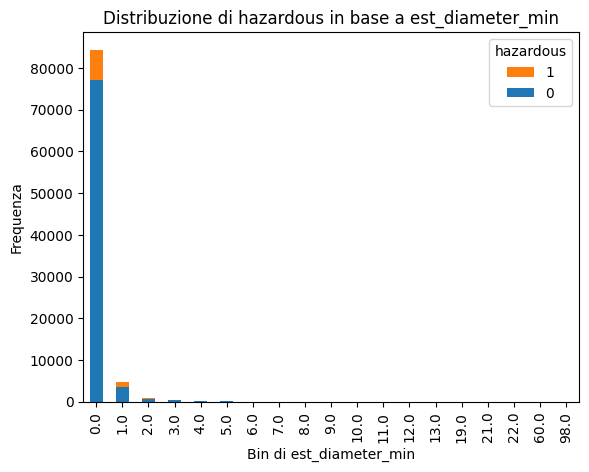

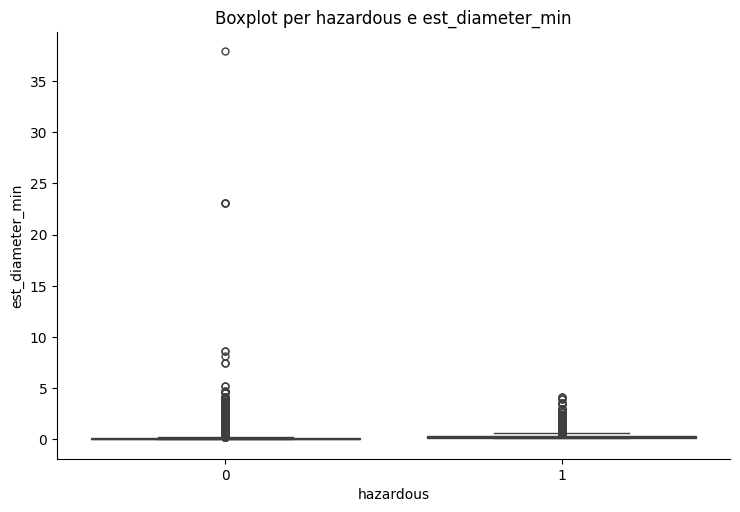

est_diameter_min
False    82530
True      8306
Name: count, dtype: int64
est_diameter_max e hazardous


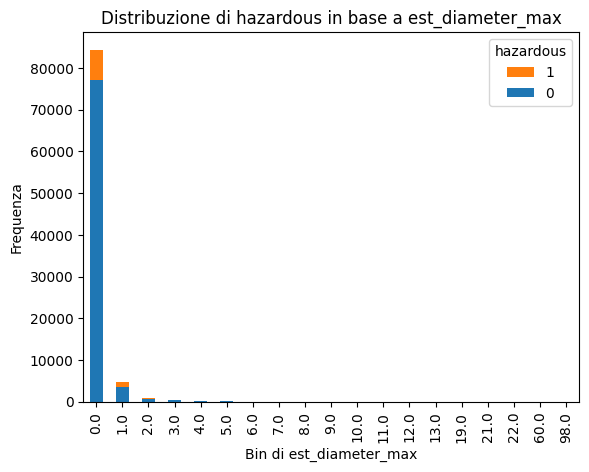

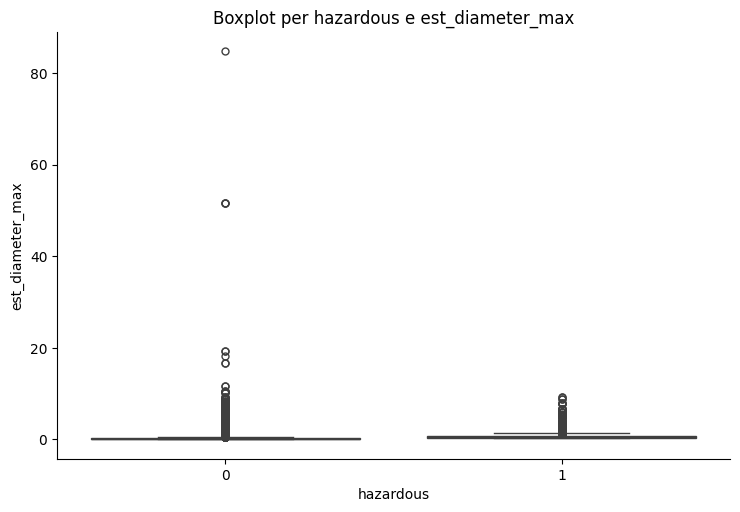

est_diameter_max
False    82530
True      8306
Name: count, dtype: int64
relative_velocity e hazardous


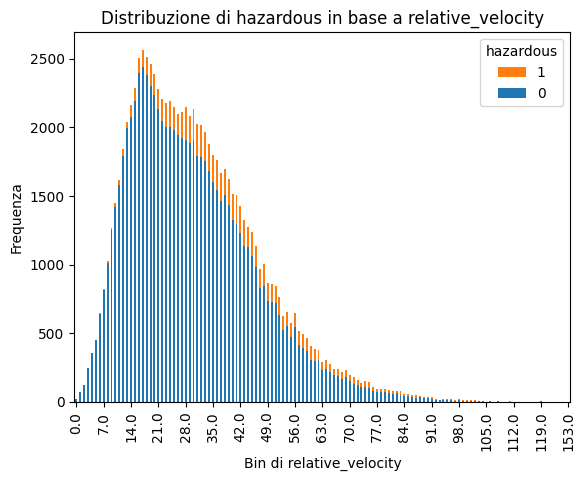

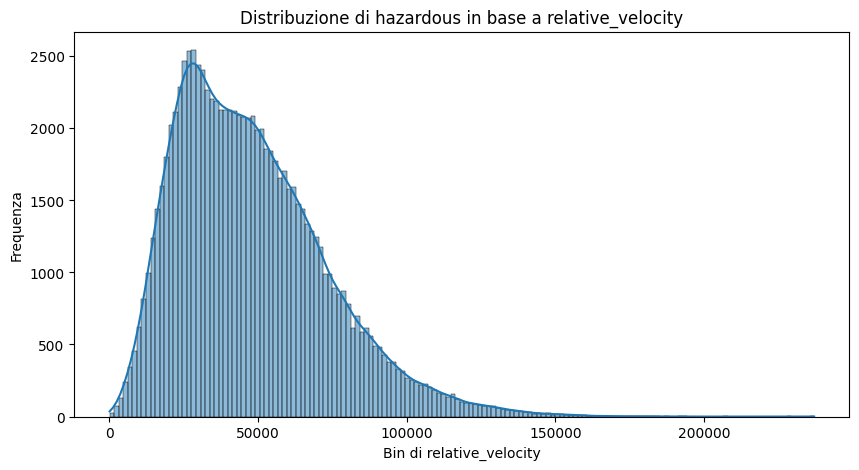

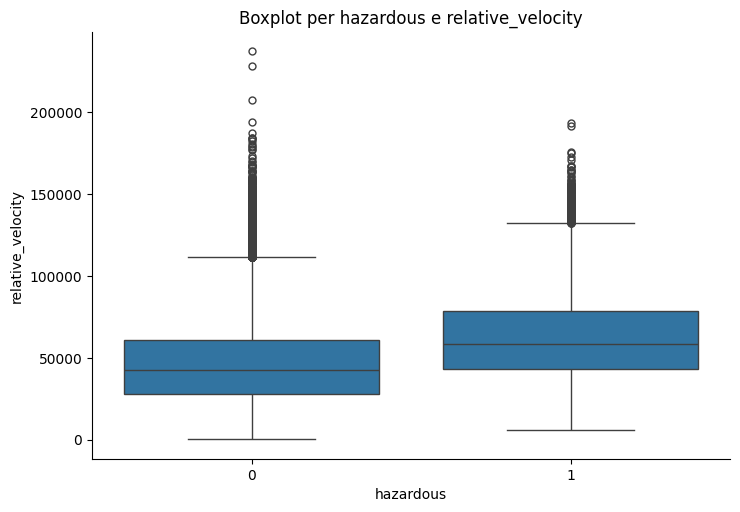

relative_velocity
False    89262
True      1574
Name: count, dtype: int64
miss_distance e hazardous


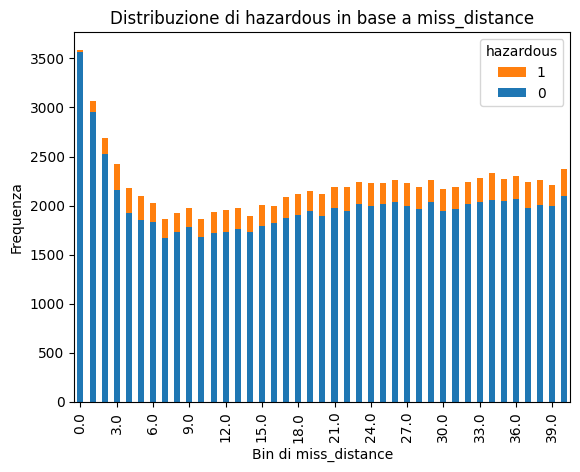

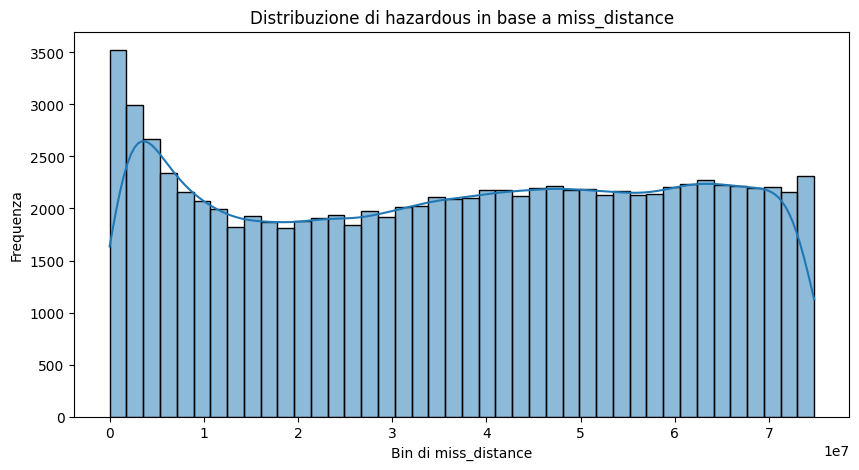

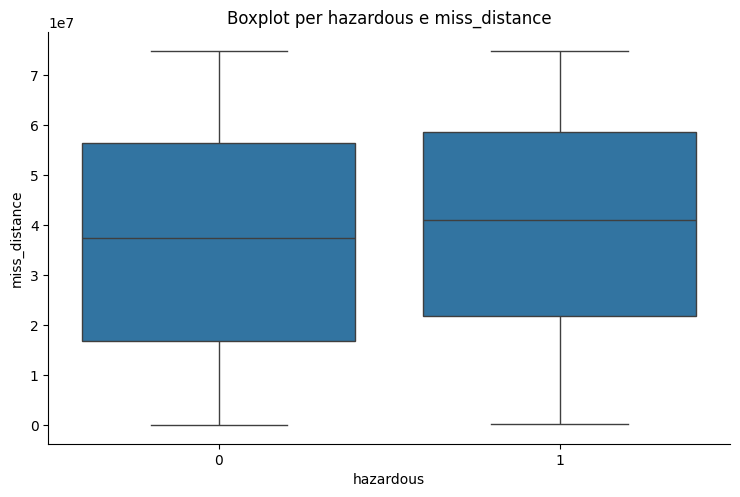

miss_distance
False    90836
Name: count, dtype: int64
absolute_magnitude e hazardous


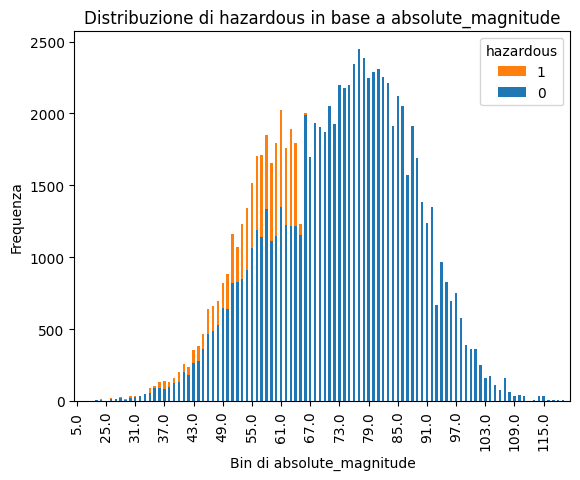

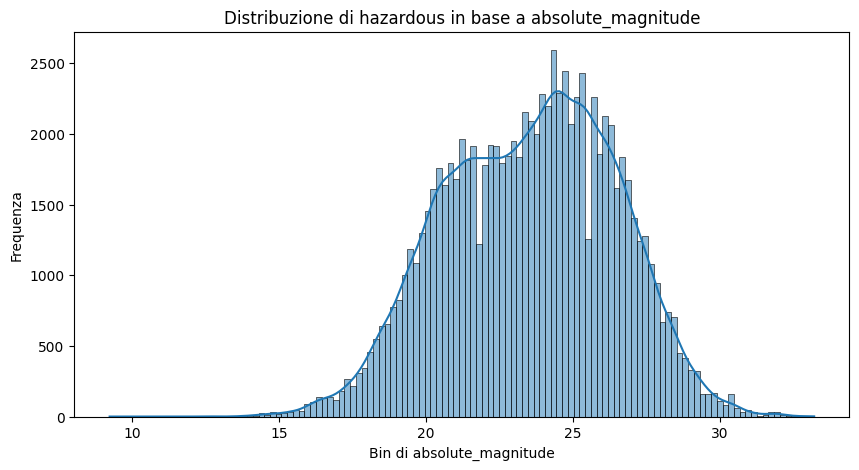

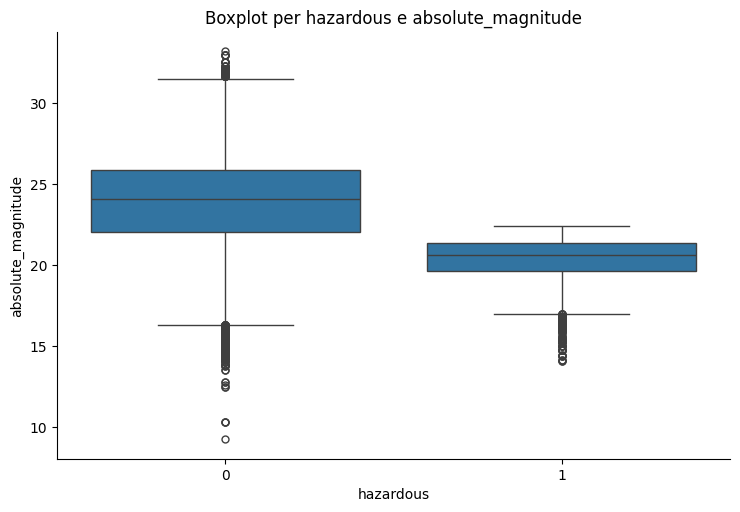

absolute_magnitude
False    90735
True       101
Name: count, dtype: int64
Bin e hazardous
media_diametro e hazardous


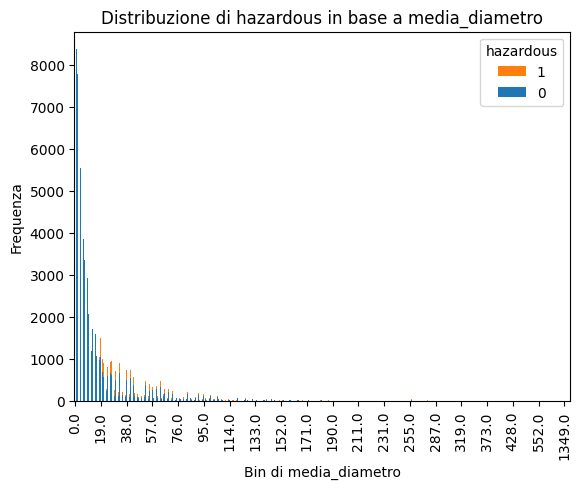

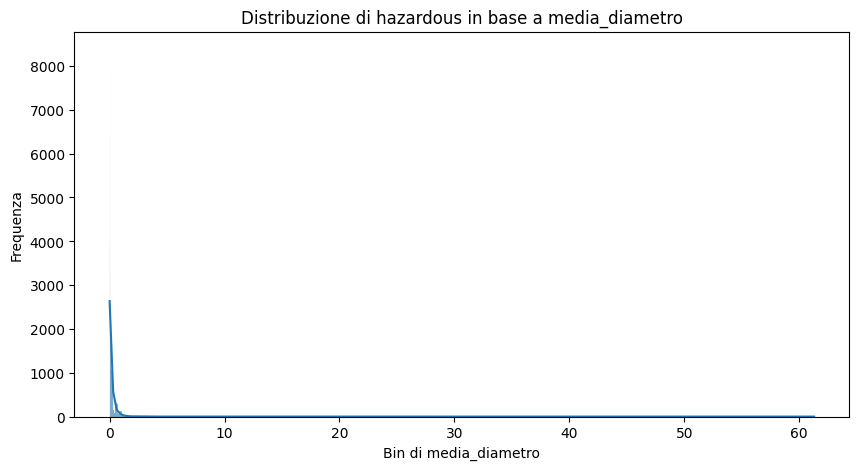

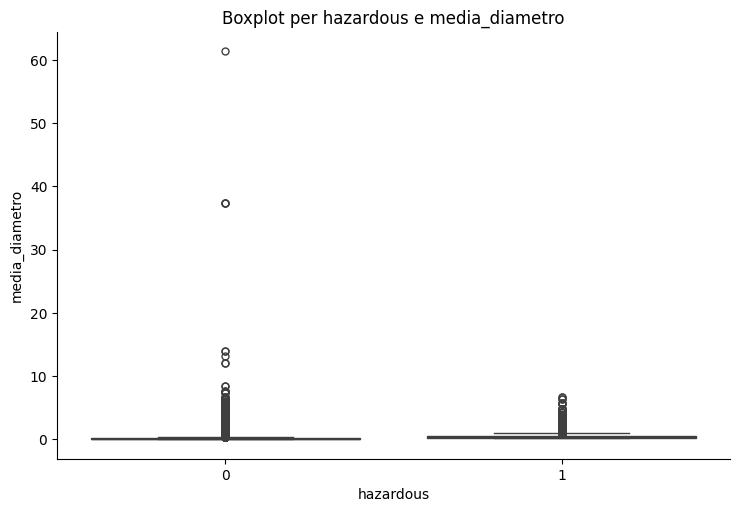

media_diametro
False    82530
True      8306
Name: count, dtype: int64


In [ ]:
var_list = df.columns.tolist()

var_list.remove("hazardous")
var_list.remove("id")

n_class_diameter = 100

for a in var_list:
    print(a + " e hazardous")
    if a == "est_diameter_min" or a == "est_diameter_max":
        bar_plot(a, "hazardous", df, n_class_diameter)
        boxPlot("hazardous", a, df)
        printOutliers(a)
    elif a != "Bin":
        bar_plot(a, "hazardous", df, freedman_diaconis_bins(df[a])) 
        bar_distribution(a, "hazardous",df, freedman_diaconis_bins(df[a]))
        boxPlot("hazardous", a, df)
        printOutliers(a)

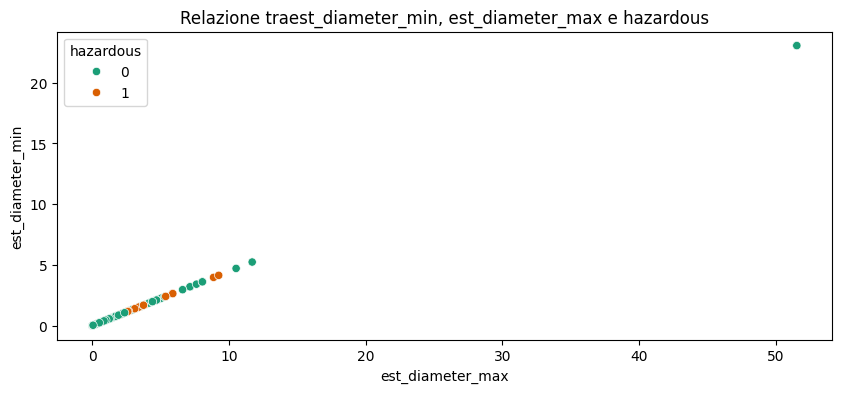

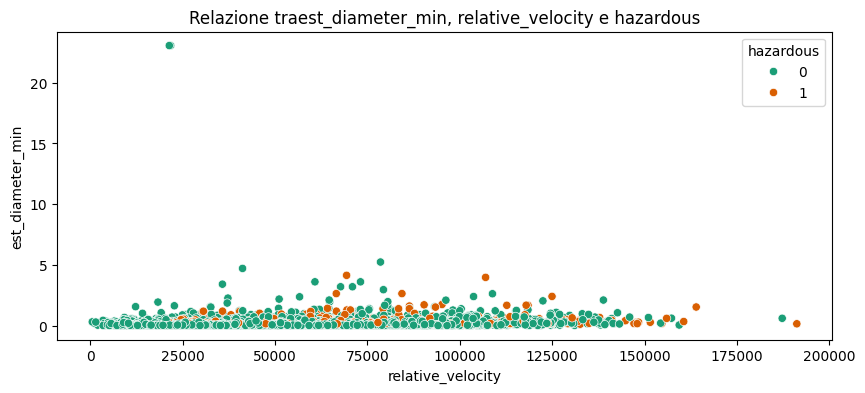

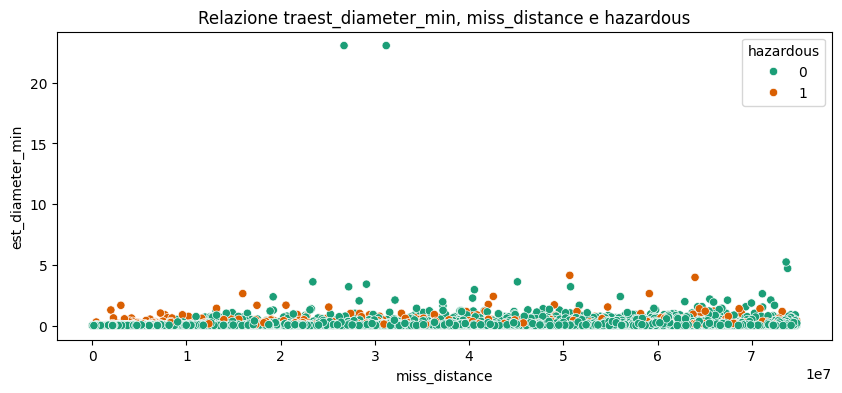

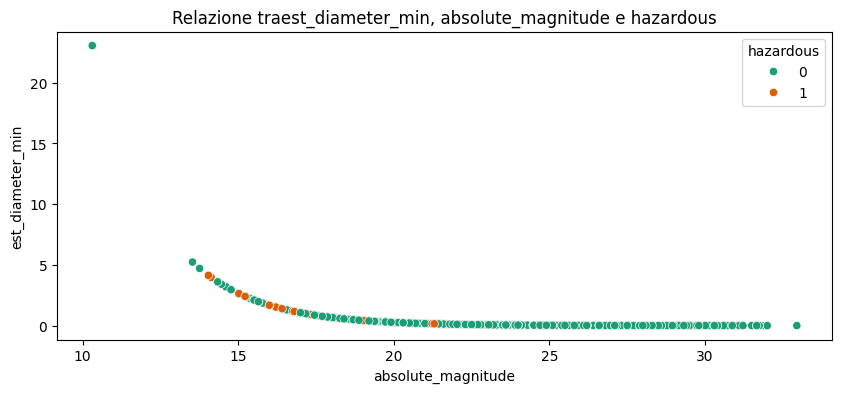

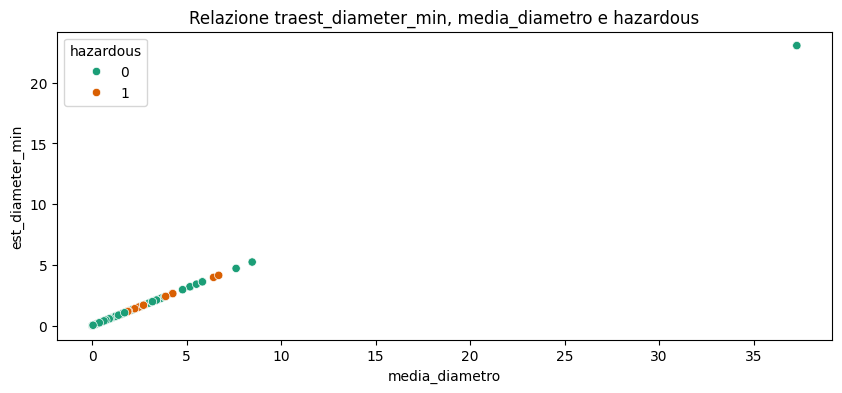

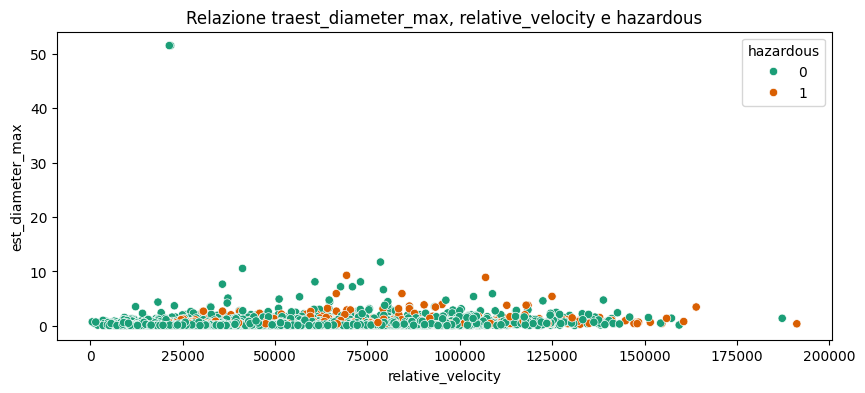

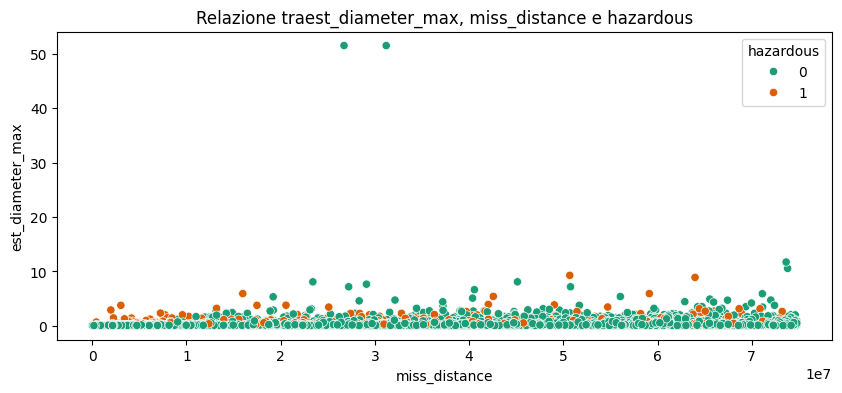

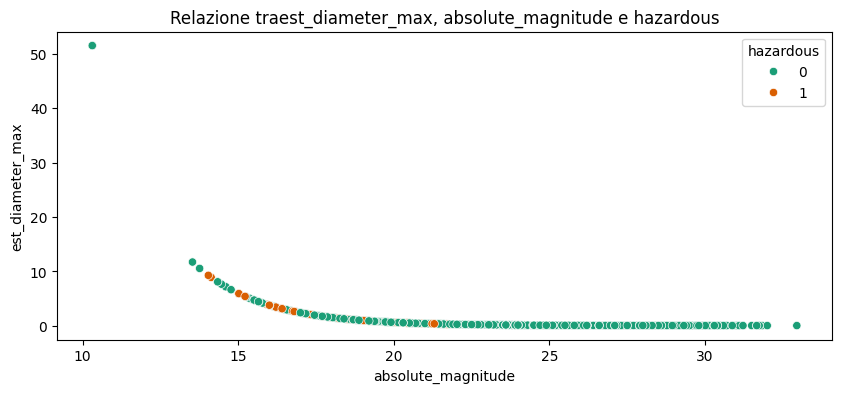

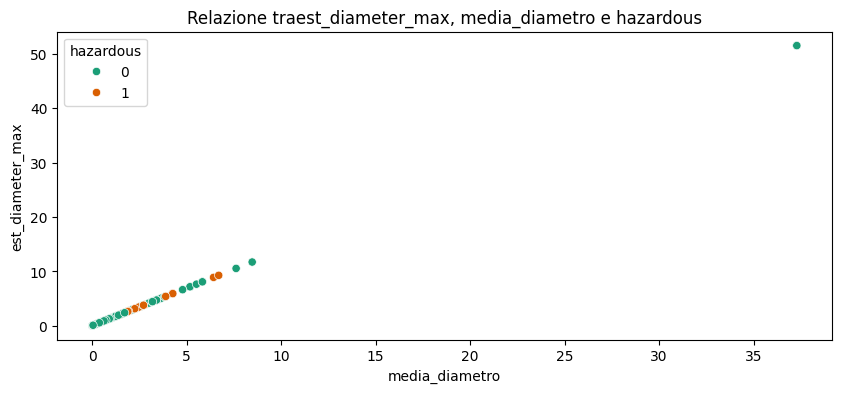

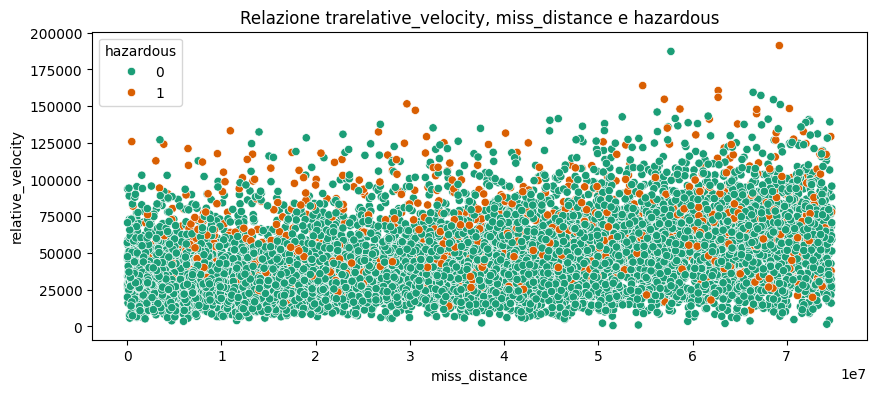

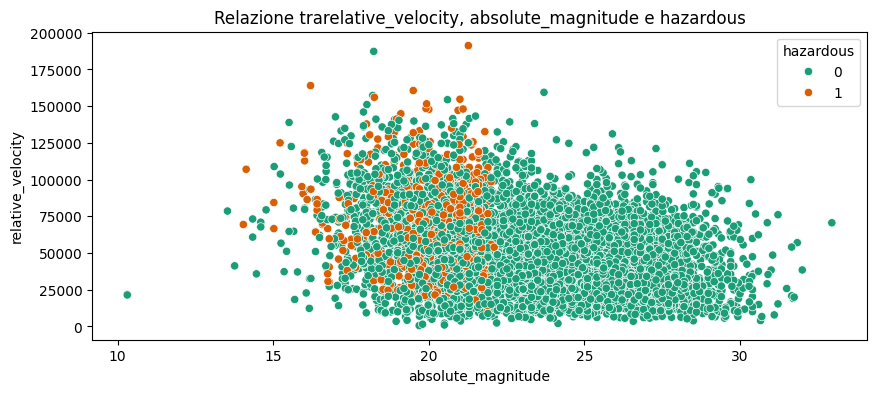

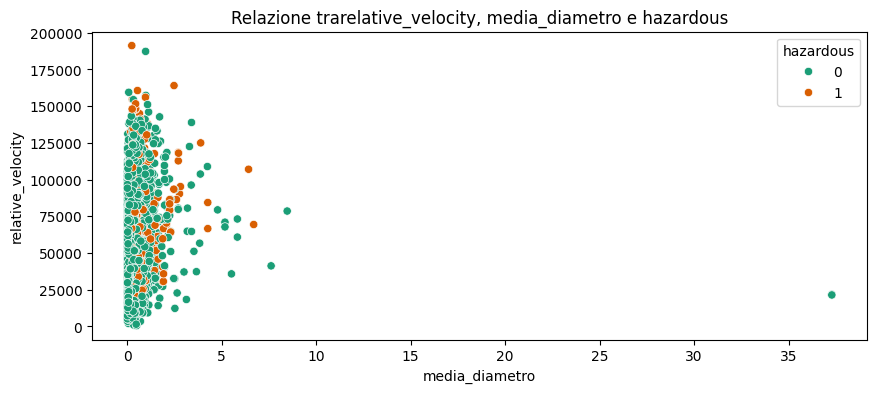

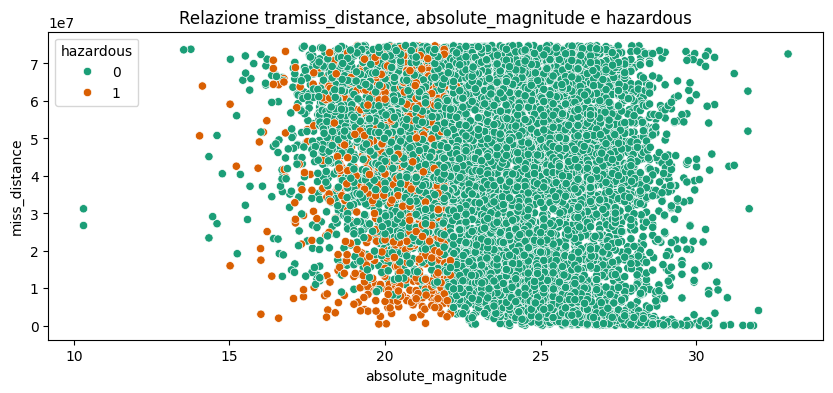

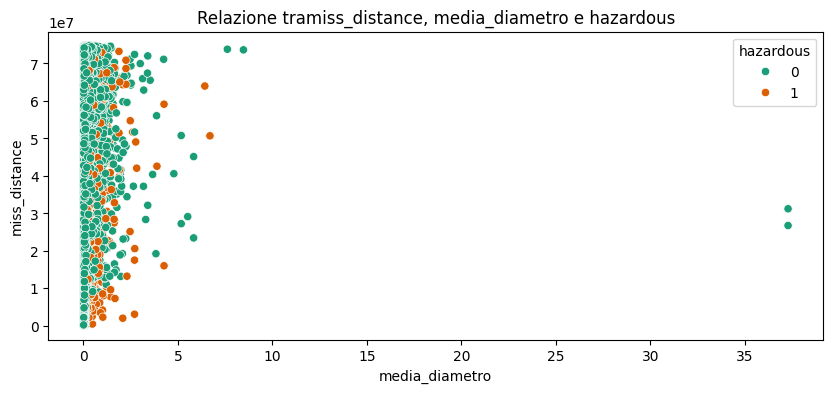

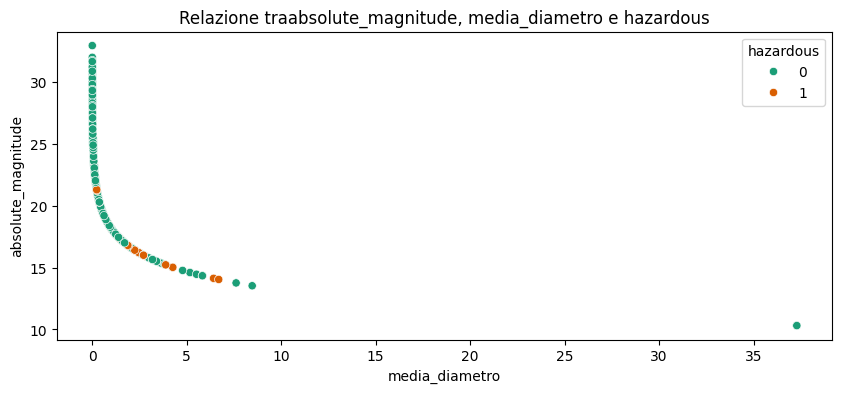

In [ ]:
var_list = df.columns.tolist()

var_list.remove("hazardous")
var_list.remove("id")
var_list.remove("Bin")

length_var_list = len(var_list)

for x in range (0, length_var_list):
    a = var_list[0]
    var_list.remove(a)
    length_var_list = length_var_list - 1

    for b in var_list:
        scatterPlot(a, b, "hazardous", df_sampled)

# Pca
La Principal Component Analysis (PCA) è un'analisi multivariata utilizzata per ridurre la dimensionalità di un insieme di dati, identificando le componenti principali che rappresentano la maggior parte della variazione dei dati. In Python, la libreria scikit-learn fornisce una classe PCA che può essere utilizzata per eseguire la PCA.

In [ ]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9084 entries, 20406 to 19468
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9084 non-null   int64  
 1   est_diameter_min    9084 non-null   float64
 2   est_diameter_max    9084 non-null   float64
 3   relative_velocity   9084 non-null   float64
 4   miss_distance       9084 non-null   float64
 5   absolute_magnitude  9084 non-null   float64
 6   hazardous           9084 non-null   int32  
 7   Bin                 9084 non-null   float64
 8   media_diametro      9084 non-null   float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 674.2 KB


In [ ]:
var_numeriche = list(df_sampled.columns[1:-1])
var_numeriche.remove("hazardous")
var_numeriche.remove("Bin")
print(var_numeriche)

['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']


In [ ]:
#alla fine i valori saranno 12 per ogni riga e vado a standardizzarli cioè X-MEDIA X/ DEV STANDARD X
scaled_data = StandardScaler().fit_transform(df_sampled[var_numeriche])
scaled_data

array([[-0.26050542, -0.26050542, -1.03265198,  0.58605655,  0.57645781],
       [-0.28820348, -0.28820348, -0.86154539, -1.5810969 ,  1.05799164],
       [-0.28676182, -0.28676182, -0.57323515, -1.48032423,  1.02359637],
       ...,
       [-0.24541316, -0.24541316,  0.20087692,  1.20634167,  0.40448145],
       [ 0.23785331,  0.23785332,  0.12769806,  0.33891668, -1.10891058],
       [-0.25186983, -0.25186983,  0.31368978, -1.03485678,  0.47327199]])

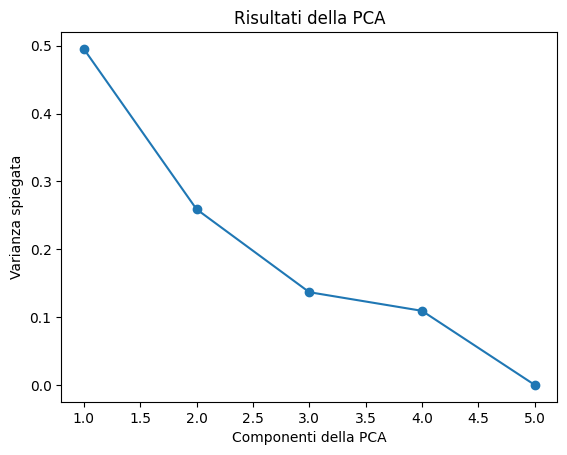

In [ ]:
pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente, tramite la pca vado a scegliere le variabili che mi portano
# una certa varianza e che quindi "parla", così da evitare di avere troppe variabili e quindi a servirmi più dati.(aumento var= aumento istanze)
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [ ]:
# Applica la PCA per ridurre la dimensionalità dei dati
# Per esempio, se hai addestrato PCA per mantenere solo le prime due componenti principali (n_components=2),
# pca_data avrà due colonne. Ogni riga in pca_data rappresenta la posizione di un campione nel nuovo spazio delle componenti principali.
pca = PCA(n_components=3).fit(scaled_data) # pca in base solo alle prime 10 componenti
pca_data = pca.transform(scaled_data)

# Quantifichiamo  la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.495202   0.25893038 0.13667304]


In [ ]:
#Verifichiamo il coefficienti degli autovalori
# > 1 indica che le PC spiegano più varianza di una singola variabile originale nella data standardizzata: Gli eigenvalori rappresentano la varianza spiegata da ciascuna componente principale. Un eigenvalue maggiore
#di 1 indica che la corrispondente componente principale spiega più varianza rispetto a quella contenuta in una singola variabile originale prima della standardizzazione.
#Questo criterio viene spesso utilizzato come punto di taglio per decidere quante componenti principali trattenere. In altre parole, si possono mantenere solo le componenti
# principali che spiegano più varianza rispetto a una singola variabile originale
eigenvalues = pca.explained_variance_
n_samples = scaled_data.shape[0] #(n_samples, n_features) campioni e variabili
cov_matrix = np.dot(scaled_data.T, scaled_data) / n_samples #.T è la trasposta, /n normalizzo la matrice così che i val riflettano la cov media tra le var
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

2.4760099961530333
2.4762825944130946
1.2946518939042218
1.2947944296186236
0.6833652241608069
0.6834404597904625


In [ ]:
unique_labels = np.unique(df_sampled["hazardous"])
unique_labels

array([0, 1])

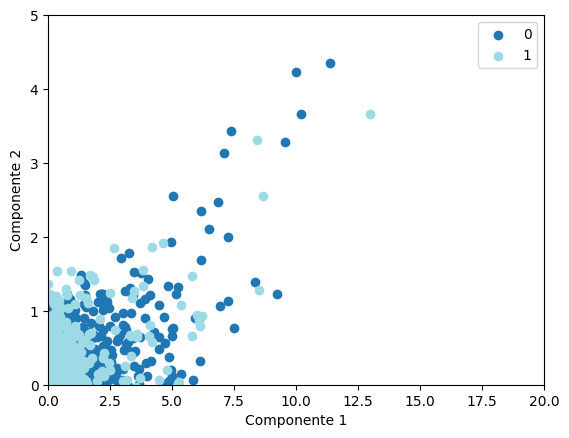

In [ ]:
# crea una mappa etichetta-->codice colore
unique_labels = np.unique(df_sampled["hazardous"])
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
label_to_color = dict(zip(unique_labels, colors)) # zip crea delle tupe dove nel primo val c'è un_lab e poi colors

# genera il grafico
fig, ax = plt.subplots()
plt.xlim(0, 20)
plt.ylim(0, 5)
for label in unique_labels :
    mask = (df_sampled["hazardous"] == label).values # indica dove la colonna competition è uguale all'etichetta corrente, per tutte le righe
    ax.scatter(pca_data[mask, 0], pca_data[mask, 1], color=label_to_color[label], label=label)

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

ax.legend()

plt.show()

#- A high cos2 indicates a good representation of
#the individual on the principal component.
#- A low cos2 indicates that the individual is not
#perfectly represented by the PCs

In [ ]:
df_value = df_sampled[var_numeriche]
df_value

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
20406,0.024241,0.054205,22148.962596,5.028574e+07,25.20
74443,0.012722,0.028447,26477.211836,1.683201e+06,26.60
74306,0.013322,0.029788,33770.201397,3.943220e+06,26.50
45943,0.193444,0.432554,43599.575296,7.346837e+07,20.69
62859,0.044112,0.098637,36398.080883,6.352916e+07,23.90
...,...,...,...,...,...
23678,0.025384,0.056760,72265.173048,7.230120e+07,25.10
27239,0.033462,0.074824,102070.935681,8.161819e+06,24.50
10598,0.030518,0.068240,53351.854832,6.419682e+07,24.70
48711,0.231502,0.517654,51500.749410,4.474316e+07,20.30


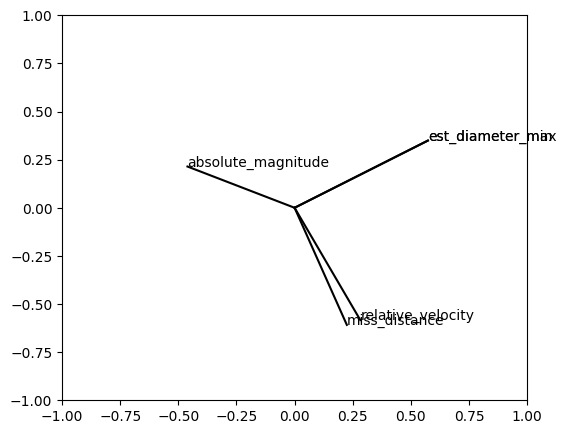

In [ ]:
pcs = pca.components_
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # display the label of the point
    ax.text(x, y, df_value.columns[i], fontsize='10')

#- Positively correlated variables are grouped together.
#- Negatively correlated variables are positioned on
#opposite sides of the plot origin (opposed
#quadrants).
#- The distance between variables and the origin
#measures the quality of the variables. Variables that
#are away from the origin are well represented

# ALBERI DECISIONALI

In [ ]:
file_dataset = 'neo.csv'

df = pd.read_csv(file_dataset)

df_sampled = df.sample(frac=0.1, random_state=42)  # random_state per riproducibilità

df_sampled.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [ ]:
# Rimuovere la colonna 'Colonna2'
#df = df.drop('Bin', axis=1)
df_sampled = df_sampled.drop('orbiting_body', axis=1)
df_sampled = df_sampled.drop('sentry_object', axis=1)
df_sampled = df_sampled.drop('id', axis=1)
df_sampled = df_sampled.drop('name', axis=1)
df_sampled.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

feature_names = list(set(df_sampled.columns) - set(["hazardous"]))
target_name = "hazardous"

X_train, X_test, y_train, y_test = train_test_split(df_sampled[feature_names], df_sampled[target_name], test_size=0.3, random_state=42) #generazione casuale di esempi da prendere con 42 prende sempre la seq numero 42 cas

In [ ]:
print(f"Numero di record nel training set: {X_train.shape[0]}")
print(f"Numero di record nel test set: {X_test.shape[0]}")

Numero di record nel training set: 6358
Numero di record nel test set: 2726


In [ ]:
X_train.dtypes

relative_velocity     float64
miss_distance         float64
est_diameter_max      float64
est_diameter_min      float64
absolute_magnitude    float64
dtype: object

In [ ]:
X_train

,relative_velocity,miss_distance,est_diameter_max,est_diameter_min,absolute_magnitude
3200,55692.241605,5.772715e+07,0.082043,0.036691,24.30
71402,41515.688545,4.532551e+07,0.078350,0.035039,24.40
9030,46363.670604,1.607997e+07,0.450858,0.201630,20.60
88436,10015.532093,1.503471e+06,0.009639,0.004311,28.95
9451,74161.799931,4.082873e+07,0.215794,0.096506,22.20
...,...,...,...,...,...
28030,49210.383363,1.679086e+07,0.074824,0.033462,24.50
78825,32296.394879,1.545306e+07,0.113250,0.050647,23.60
70757,92856.555783,4.262163e+07,0.529712,0.236894,20.25
57063,42016.482375,1.862561e+07,0.066687,0.029823,24.75


In [ ]:
#for col in X_train.columns:
#  X_train[col] = X_train[col].astype(int)
#  X_test[col] = X_test[col].astype(int)

In [ ]:
#X_train.dtypes

In [ ]:
#X_train

## Modello di baseline

In [ ]:
y_train.value_counts() / y_train.count()

hazardous
False    0.906103
True     0.093897
Name: count, dtype: float64

In [ ]:
y_test.value_counts() / y_test.count()

hazardous
False    0.906456
True     0.093544
Name: count, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Valuta il modello utilizzando i dati di test
y_pred = model.predict(X_test)
accuracy_train_test = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Stampa le prestazioni del modello
print("Metriche con gini Index")
print('Accuracy:', accuracy_train_test)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Metriche con gini Index
Accuracy: 0.9053558327219369
Precision: 0.48314606741573035
Recall: 0.16862745098039217
F1-score: 0.25


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[2425,  212],
       [  46,   43]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.98      0.92      0.95      2637
        True       0.17      0.48      0.25        89

    accuracy                           0.91      2726
   macro avg       0.58      0.70      0.60      2726
weighted avg       0.95      0.91      0.93      2726



In [ ]:
#complexity_values = [0.001, 0.01, 0.1, 1, 10, 100]
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# # Addestra l'albero decisionale con diversi valori di complessità
# train_accuracy = []
# test_accuracy = []
# for complexity in ccp_alphas:
#     clf = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, ccp_alpha=complexity)
#     clf.fit(X_train, y_train)
#     train_accuracy.append(clf.score(X_train, y_train))
#     test_accuracy.append(clf.score(X_test, y_test))

# # Plotta l'accuratezza del modello in funzione del parametro di complessità
# plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
# plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
# plt.xlabel('Complexity Parameter')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Complexity Parameter')
# plt.xscale('log')
# plt.legend()
# plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, max_depth=10, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.036047593001643286


In [ ]:
# #alpha è prouning
# clfs = clfs[:-1]
# complexity_values = ccp_alphas[:-1]

# node_counts = [clf.tree_.node_count for clf in clfs]
# depth = [clf.tree_.max_depth for clf in clfs]
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
# ax[0].set_xlabel("alpha")
# ax[0].set_ylabel("number of nodes")
# ax[0].set_title("Number of nodes vs alpha")
# ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
# ax[1].set_xlabel("alpha")
# ax[1].set_ylabel("depth of tree")
# ax[1].set_title("Depth vs alpha")
# fig.tight_layout()

### ALBERI TAGLIATI IN BASE AL PARAMETRO DI COMPLESSITA'

In [ ]:
# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    # Visualizza l'albero decisionale
    # plt.figure(figsize=(12, 8))
    # plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
    # plt.text(0.5, 1.05, f'Complexity {complexity}', transform=plt.gca().transAxes, ha='center')
    # plt.show()
    # Valuta il modello utilizzando i dati di test
    y_pred = clf.predict(X_test)
    accuracy_train_test = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Stampa le prestazioni del modello
    print('Accuracy:', accuracy_train_test)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print(classification_report(y_pred, y_test))
    print("\n")
    
# se aumento il valore della max depth va in overfitting
#il valore y[0/1] indica la classe di appartenenza

Accuracy: 0.9053558327219369
Precision: 0.48314606741573035
Recall: 0.16862745098039217
F1-score: 0.25
              precision    recall  f1-score   support

       False       0.98      0.92      0.95      2637
        True       0.17      0.48      0.25        89

    accuracy                           0.91      2726
   macro avg       0.58      0.70      0.60      2726
weighted avg       0.95      0.91      0.93      2726



Accuracy: 0.9053558327219369
Precision: 0.48314606741573035
Recall: 0.16862745098039217
F1-score: 0.25
              precision    recall  f1-score   support

       False       0.98      0.92      0.95      2637
        True       0.17      0.48      0.25        89

    accuracy                           0.91      2726
   macro avg       0.58      0.70      0.60      2726
weighted avg       0.95      0.91      0.93      2726



Accuracy: 0.9053558327219369
Precision: 0.48314606741573035
Recall: 0.16862745098039217
F1-score: 0.25
              precision    recall

c:\Users\Garnet14\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Garnet14\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Garnet14\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

In [ ]:
grid_param = [
            [{
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2'],
            'random_state': [42],
            'max_leaf_nodes': [None, 5, 10, 20],
            'min_impurity_decrease': [0.0, 0.1, 0.2],
            }]
        ]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definisci il dizionario di iperparametri
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42],
    'max_leaf_nodes': [None, 2],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

# Crea un'istanza del DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# Usato in GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=10, scoring='roc_auc')

# Ad esempio, supponiamo che tu abbia i dati X_train e y_train
grid_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("I migliori parametri sono:", grid_search.best_params_)

I migliori parametri sono: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

feature_names = list(set(df.columns) - set(["hazardous"]))
target_name = "hazardous"

X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_name], test_size=0.3, random_state=42) #generazione casuale di esempi da prendere con 42 prende sempre la seq numero 42 cas

In [ ]:
y_train.shape


(63585,)

In [ ]:
Y_train_p = y_train

In [ ]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train[feature_names] = scaler.fit_transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

X_train.describe()

,miss_distance,media_diametro,relative_velocity,absolute_magnitude
count,6.358500e+04,6.358500e+04,6.358500e+04,6.358500e+04
mean,-1.028072e-17,1.977920e-17,8.576575e-17,-1.856563e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.656995e+00,-4.292230e-01,-1.889855e+00,-4.938454e+00
25%,-8.882048e-01,-3.659141e-01,-7.699061e-01,-7.571826e-01
50%,3.573814e-02,-2.670726e-01,-1.543654e-01,5.766462e-02
75%,8.712462e-01,5.558780e-02,5.877619e-01,7.482131e-01
max,1.691341e+00,1.282218e+02,7.470729e+00,3.337770e+00


In [ ]:
#y_train_numeric = y_train.astype(int)
#y_test_mod = keras.utils.to_categorical(y_test)

In [ ]:
#from keras.utils import to_categorical

#num_classes = 2  # Numero totale di classi binarie
#y_train_one_hot = to_categorical(y_train_numeric, num_classes=num_classes)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Trasformiamo le variabili categoriche
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Trasformiamo le variabili categoriche
encoder.fit(y_test)
y_test_mod = encoder.transform(y_test)

In [ ]:
encoded_Y 


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
y_test

20406    False
74443    False
74306    False
45943    False
62859    False
         ...  
43433    False
52420    False
81204    False
22293    False
62466    False
Name: hazardous, Length: 27251, dtype: bool

A questo punto, utilizziamo la libreria **Keras** che permette di implementare facilmente una rete neurale

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Definiamo l'archietettura della rete neurale:

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu', name="input"))
model.add(Dense(1, activation='sigmoid', name="output"))

# Compile the model
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Facciamo il training della rete e valutiamo le performance

In [ ]:

# Train the model
history = model.fit(X_train, encoded_Y, epochs=10, batch_size=5, verbose=1)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_mod, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
  497/12717 [>.............................] - ETA: 13s - loss: 0.4887 - accuracy: 0.8266

12717/12717 [==============================] - 13s 1ms/step - loss: 0.2222 - accuracy: 0.9011
Epoch 2/10
12717/12717 [==============================] - 12s 978us/step - loss: 0.1945 - accuracy: 0.9059
Epoch 3/10
12717/12717 [==============================] - 12s 951us/step - loss: 0.1931 - accuracy: 0.9071
Epoch 4/10
12717/12717 [==============================] - 12s 909us/step - loss: 0.1925 - accuracy: 0.9075
Epoch 5/10
12717/12717 [==============================] - 12s 907us/step - loss: 0.1923 - accuracy: 0.9087
Epoch 6/10
12717/12717 [==============================] - 12s 943us/step - loss: 0.1920 - accuracy: 0.9084
Epoch 7/10
12717/12717 [==============================] - 12s 917us/step - loss: 0.1919 - accuracy: 0.9084
Epoch 8/10
12717/12717 [==============================] - 12s 939us/step - loss: 0.1908 - accuracy: 0.9113
Epoch 9/10
12717/12717 [==============================] - 12s 963us/step - loss: 0.1888 - accuracy: 0.9122
Epoch 10/10
12717/12717 [=========================

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Saved model to disk


In [ ]:
y_pred = model.predict(X_test)

 59/852 [=>............................] - ETA: 0s 

852/852 [==============================] - 1s 808us/step


In [ ]:
y_pred

array([[2.4178744e-15],
       [1.0750786e-18],
       [1.9384978e-18],
       ...,
       [1.7243117e-01],
       [2.9421773e-25],
       [3.9349263e-15]], dtype=float32)

Dato che la funzione di attivazione sigmoid, restituisce dei valori compresi nell'intervallo (0,1), poniamo una soglia di decisione a 0,5 modotale da creare un array di predizioni booleano

In [ ]:
theshold = 0.2
binary_predictions = (y_pred > theshold).astype(int)

In [ ]:
y_test

20406    False
74443    False
74306    False
45943    False
62859    False
         ...  
43433    False
52420    False
81204    False
22293    False
62466    False
Name: hazardous, Length: 27251, dtype: bool

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20197  4400]
 [  409  2245]]


313/852 [==========>...................] - ETA: 0s

852/852 [==============================] - 1s 789us/step


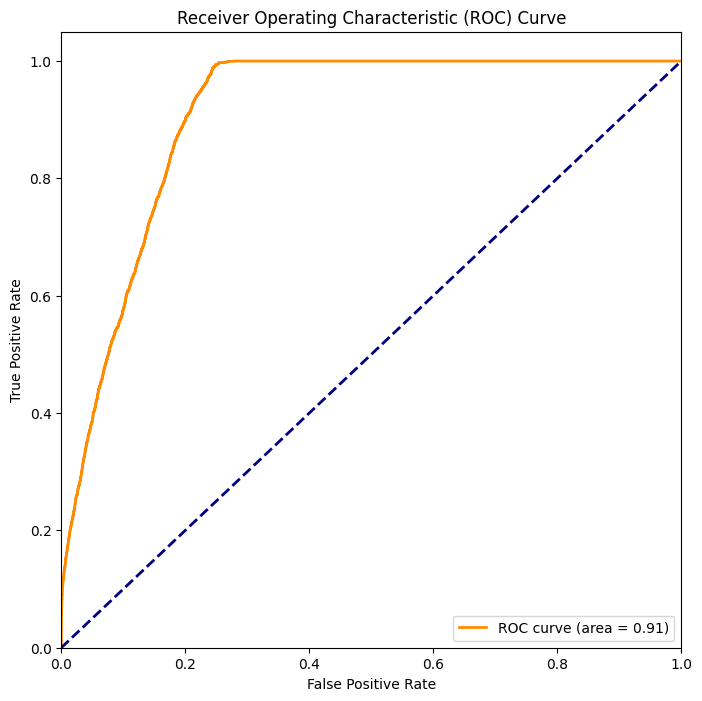

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predici le probabilità
y_prob = model.predict(X_test)

# Seleziona le probabilità della classe positiva
y_prob_positive = y_prob[:, 0]

# Calcola la curva ROC e l'area sotto la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test_mod, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predicted probabilities to binary predictions using the threshold
binary_predictions = (y_pred > threshold).astype(int)

# Calculate precision, recall, and F-measure for each class
precision_per_class = precision_score(y_test_mod, binary_predictions, average=None)
recall_per_class = recall_score(y_test_mod, binary_predictions, average=None)
f1_per_class = f1_score(y_test_mod, binary_predictions, average=None)

# Print precision, recall, and F-measure for each class
for i in range(len(precision_per_class)):
    print(f"Class {i} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}, F-measure: {f1_per_class[i]}")

# Calculate Macro average
macro_precision = precision_score(y_test_mod, binary_predictions, average='macro')
macro_recall = recall_score(y_test_mod, binary_predictions, average='macro')
macro_f1 = f1_score(y_test_mod, binary_predictions, average='macro')

# Print Macro average
print(f"Macro Average - Precision: {macro_precision}, Recall: {macro_recall}, F-measure: {macro_f1}")

Class 0 - Precision: 0.9801514122100359, Recall: 0.8211163963084929, F-measure: 0.8936132557573612
Class 1 - Precision: 0.3378480060195636, Recall: 0.8458929917106255, F-measure: 0.4828476180234434
Macro Average - Precision: 0.6589997091147998, Recall: 0.8335046940095592, F-measure: 0.6882304368904023


# Introduciamo il validation set 

In [ ]:
import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Assume df is your dataset

feature_names = list(set(df.columns) - set(["hazardous"]))
target_name = "hazardous"

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df[feature_names], df[target_name], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train[feature_names] = scaler.fit_transform(X_train[feature_names])
X_val[feature_names] = scaler.transform(X_val[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

In [ ]:
# Trasformiamo le variabili categoriche per il training set
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)

# Trasformiamo le variabili categoriche per il validation set
encoder.fit(y_val)
encoded_Y_val = encoder.transform(y_val)

# Trasformiamo le variabili categoriche per il test set
encoder.fit(y_test)
y_test_mod = encoder.transform(y_test)

In [ ]:
# Definiamo l'architettura della rete neurale:
model = Sequential()
model.add(Dense(3, input_shape=(len(feature_names),), activation='relu', name="input"))
model.add(Dense(1, activation='sigmoid', name="output"))

# Compile the model
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Train the model
history = model.fit(X_train, encoded_Y_train, epochs=10, batch_size=5, verbose=1, validation_data=(X_val, encoded_Y_val))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_mod, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# Save model architecture to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


Epoch 1/10
14534/14534 [==============================] - 16s 1ms/step - loss: 0.2325 - accuracy: 0.8930 - val_loss: 0.1874 - val_accuracy: 0.9129
Epoch 2/10
14534/14534 [==============================] - 15s 1ms/step - loss: 0.1920 - accuracy: 0.9094 - val_loss: 0.1843 - val_accuracy: 0.9130
Epoch 3/10
14534/14534 [==============================] - 16s 1ms/step - loss: 0.1903 - accuracy: 0.9106 - val_loss: 0.1828 - val_accuracy: 0.9137
Epoch 4/10
14534/14534 [==============================] - 16s 1ms/step - loss: 0.1896 - accuracy: 0.9107 - val_loss: 0.1826 - val_accuracy: 0.9137
Epoch 5/10
14534/14534 [==============================] - 17s 1ms/step - loss: 0.1893 - accuracy: 0.9109 - val_loss: 0.1817 - val_accuracy: 0.9147
Epoch 6/10
14534/14534 [==============================] - 15s 1ms/step - loss: 0.1892 - accuracy: 0.9110 - val_loss: 0.1815 - val_accuracy: 0.9147
Epoch 7/10
14534/14534 [==============================] - 15s 1ms/step - loss: 0.1891 - accuracy: 0.9114 - val_loss: 0

In [ ]:
# Predictions and Confusion Matrix
y_pred = model.predict(X_test)
threshold = 0.2
binary_predictions = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, binary_predictions)

print("Confusion Matrix:")
print(conf_matrix)

284/284 [==============================] - 0s 748us/step
Confusion Matrix:
[[6154 2047]
 [  28  855]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predicted probabilities to binary predictions using the threshold
binary_predictions = (y_pred > threshold).astype(int)

# Calculate precision, recall, and F-measure for each class
precision_per_class = precision_score(y_test_mod, binary_predictions, average=None)
recall_per_class = recall_score(y_test_mod, binary_predictions, average=None)
f1_per_class = f1_score(y_test_mod, binary_predictions, average=None)

# Print precision, recall, and F-measure for each class
for i in range(len(precision_per_class)):
    print(f"Class {i} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}, F-measure: {f1_per_class[i]}")

# Calculate Macro average
macro_precision = precision_score(y_test_mod, binary_predictions, average='macro')
macro_recall = recall_score(y_test_mod, binary_predictions, average='macro')
macro_f1 = f1_score(y_test_mod, binary_predictions, average='macro')

# Print Macro average
print(f"Macro Average - Precision: {macro_precision}, Recall: {macro_recall}, F-measure: {macro_f1}")

Class 0 - Precision: 0.9954707214493691, Recall: 0.7503962931349836, F-measure: 0.8557324619342279
Class 1 - Precision: 0.29462439696760856, Recall: 0.9682899207248018, F-measure: 0.451783355350066
Macro Average - Precision: 0.6450475592084888, Recall: 0.8593431069298927, F-measure: 0.653757908642147


  1/284 [..............................] - ETA: 6s

284/284 [==============================] - 0s 853us/step


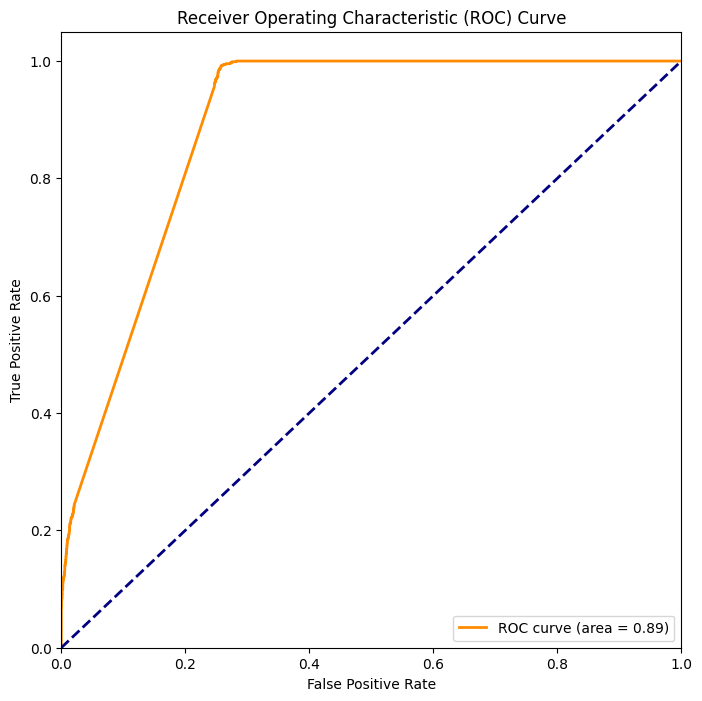

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predici le probabilità
y_prob = model.predict(X_test)

# Seleziona le probabilità della classe positiva
y_prob_positive = y_prob[:, 0]

# Calcola la curva ROC e l'area sotto la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test_mod, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## Architettura della rete

La rete è composta da due strati:

* **Strato nascosto** con 3 neuroni e funzione di attivazione ReLU.
* **Strato di output** con 1 neurone e funzione di attivazione sigmoide.

La funzione di attivazione ReLU è una funzione non lineare che consente alla rete neurale di apprendere relazioni complesse tra i dati di input.

Lo strato di output riceve come input l'output dello strato nascosto. Il neurone dello strato di output applica la funzione di attivazione sigmoide al suo input. La funzione di attivazione sigmoide restituisce un valore compreso tra 0 e 1. Questo valore può essere interpretato come la probabilità che il dato di input sia classificato come "hazardous".


## Impostazioni di allenamento

La rete è addestrata utilizzando l'algoritmo di ottimizzazione Adam con una loss function di binary_crossentropy. L'allenamento viene eseguito per 10 epoche con un batch size di 5.

## Valutazione delle prestazioni

La rete viene valutata su un set di dati di test. La precisione della classificazione è del 90%.

## Conclusione

La rete neurale ha dimostrato di essere in grado di classificare in modo efficace i dati di test. La precisione del 90% è un risultato promettente che può essere ulteriormente migliorato con ulteriori sperimentazioni.


Primo Modello (senza validation):

- **Classe 0:**
  - Precision: 98.02%
  - Recall: 82.11%
  - F-measure: 89.36%

- **Classe 1:**
  - Precision: 33.79%
  - Recall: 84.59%
  - F-measure: 48.28%

- **Media Macro (Media ponderata delle classi):**
  - Precision: 65.90%
  - Recall: 83.35%
  - F-measure: 68.82%


Secondo Modello (con validation):

- **Classe 0:**
  - Precision: 99.66%
  - Recall: 74.87%
  - F-measure: 85.50%

- **Classe 1:**
  - Precision: 29.49%
  - Recall: 97.62%
  - F-measure: 45.30%

- **Media Macro (Media ponderata delle classi):**
  - Precision: 64.57%
  - Recall: 86.25%
  - F-measure: 65.40%

Interpretazione:

Il secondo modello sembra avere una precisione più elevata per la Classe 0, ma una recall inferiore rispetto al primo modello.
Per la Classe 1, il secondo modello mostra una recall molto alta, ma una precisione molto bassa, indicando che sta identificando molte istanze come appartenenti alla Classe 1, anche se non lo sono realmente.
La media macro ponderata mostra che, complessivamente, i risultati del primo modello sono leggermente migliori.

In generale, la scelta tra i modelli dipenderà dagli obiettivi specifici del problema che stai affrontando. Ad esempio, se la Classe 1 è particolarmente importante e non puoi permetterti falsi negativi (istanze della Classe 1 non identificate), potresti preferire il secondo modello nonostante la precisione più bassa. Se hai bisogno di un bilancio tra precisione e recall, dovresti valutare le tue priorità e decidere quale modello meglio si adatta alle tue esigenze.